In [1]:
import numpy as np

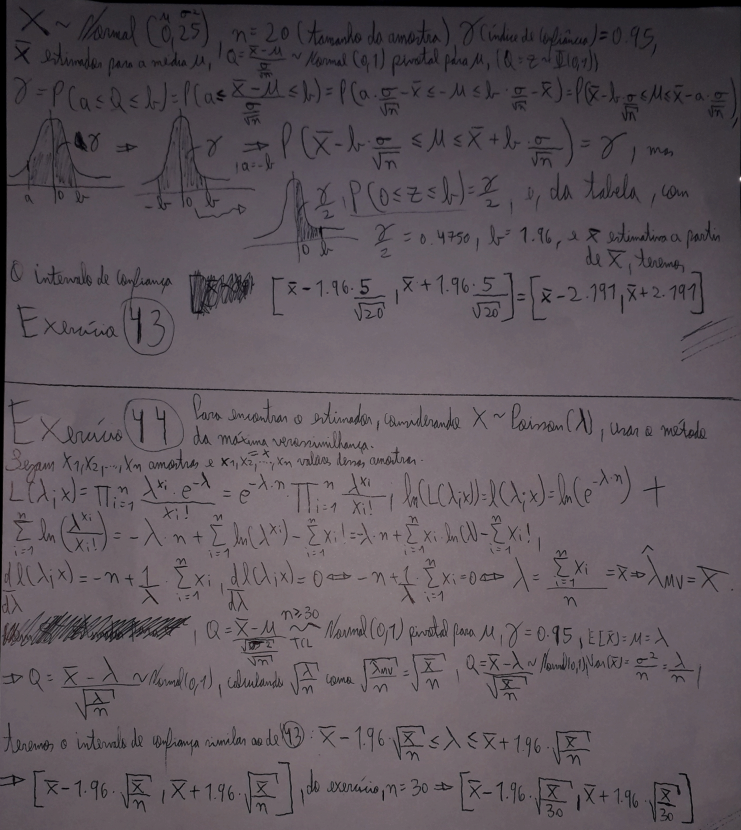

In [27]:
from IPython.display import Image
Image("/content/img.png")

In [3]:
# Função para verificar se um valor está no intervalo de confiança
def is_in_IC(IC, value):
    lower_bound, upper_bound = IC
    return lower_bound <= value <= upper_bound

In [18]:
# (1)
# Intervalo de confiança para a média. Construído por meio de Normal(0, 25) (sd = 5), n=20, gamma=0.95, alpha = 0.05 e estatístico X barra para a média
def IC1(samples):
    samples_mean = np.mean(samples)
    lower_bound = samples_mean - 2.191
    upper_bound = samples_mean + 2.191
    return (lower_bound, upper_bound)

# (i) Faz 100 intervalos de confiança de acordo com IC1 já estebelecido e verifica em quantos a média real está
def p_correct_IC1(number_IC):
    real_mean = 0
    correct_IC = 0
    for _ in range(number_IC):
        samples = np.random.normal(loc=real_mean, scale=5, size=20)  # N(0, 25), sd = 5
        ic = IC1(samples)
        if is_in_IC(ic, real_mean):
            correct_IC += 1
    return correct_IC / number_IC

# Faz (i) 5 vezes
for i in range(5):
    print(p_correct_IC1(100))

# Observa-se que os resultados estão de acordo com o nível de confiança estabelecido (95%)

0.95
0.96
0.94
0.94
0.95


In [26]:
# (2)
# Intervalo de confiança para lambda da distribuição Poisson. Construído por meio de Normal(0,1), n=30, gamma=0.95, alpha = 0.05 e
# estatístico X barra obtido por meio do método da máxima verossimilhança
def IC2(samples):
    samples_mean = np.mean(samples)
    margin = 1.96 * np.sqrt(samples_mean / 30)
    lower_bound = samples_mean - margin
    upper_bound = samples_mean + margin
    return (lower_bound, upper_bound)

# (i) Faz 100 intervalos de confiança de acordo com IC2 já estebelecido e verifica em quantos o lambda real está
def p_correct_IC2(number_IC):
    real_lambda = 3.25
    correct_IC = 0
    for _ in range(number_IC):
        samples = np.random.poisson(lam=real_lambda, size=30)
        ic = IC2(samples)
        if is_in_IC(ic, real_lambda):
            correct_IC += 1
    return correct_IC / number_IC

# Faz (i) 5 vezes
for i in range(5):
    print(p_correct_IC2(100))

# Observa-se que os resultados estão de acordo com o nível de confiança estabelecido (95%)

0.95
0.95
0.92
0.98
0.95
